# Python codes for [Introduction to Computional Stochastic PDEs, CUP 2014](http://www.cambridge.org/gb/academic/subjects/mathematics/differential-and-integral-equations-dynamical-systems-and-co/introduction-computational-stochastic-pdes?format=PB&isbn=9780521728522)

Written by [T. Shardlow](http://people.bath.ac.uk/tjs42/) Dec 2015
# Chapter 5





In [2]:

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import (bytes, dict, int, list, object, range, str,
                      ascii, chr, hex, input, next, oct, open,
                      pow, round, super, filter, map, zip)
from future.builtins.disabled import (apply, cmp, coerce, execfile,
                                      file, long, raw_input, reduce, reload,
                                      unicode, xrange, StandardError)
#
import sys

In [3]:
from math import *
# Numpy
import numpy as np
from numpy import matlib
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Scipy
import scipy
from scipy import sparse
from scipy.sparse import linalg
from scipy import optimize

Chapter 5 introduces Brownian motion, the Browian bridge, and fractional Brownian motion. The next routine generates sample paths of Brownian motion on a vector of times `t`.


In [4]:
def bmotion(t):
    """
    A5.1 Page 186
    """
    X=np.zeros(t.size) # start at 0
    for n in range(1,t.size): # time loop
        dt=t[n] - t[n - 1]
        X[n]=X[n - 1] + sqrt(dt) * np.random.randn()
    return X    

We show one sample path on $[0,T]$ with $400$ time steps.

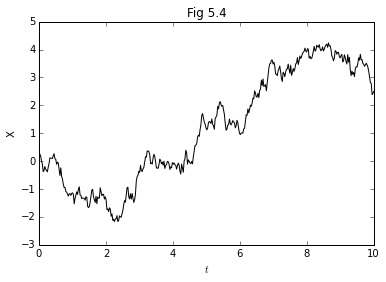

In [5]:
T=10; N=400;
t=np.linspace(0,T,N)
X=bmotion(t)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'X')
s=plt.title(r'Fig 5.4')

The Brownian bridge can be calculated from a linear transformation of Brownian motion.

In [8]:
def bb(t):
    """
    A5.2 Page 195
    """
    W=bmotion(t)
    X=W - W[-1] * (t - t[0]) / (t[-1] - t[0])
    return X

The sample paths should equal zero at both end points.

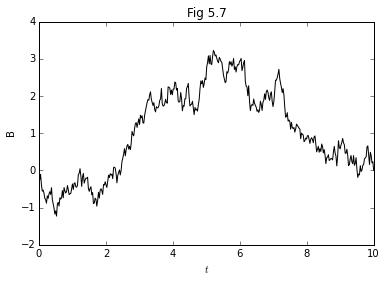

In [10]:
X=bb(t)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'B')
s=plt.title(r'Fig 5.7')

In [11]:
def fbm(t,H):
    """
    A5.3 Page 200
    """
    N=t.size
    C_N=np.zeros((N,N))
    for i in range(0,N): # compute covariance matrix
        for j in range(0,N):
            ti=t[i];             tj=t[j]
            C_N[i,j]=0.5 * (ti ** (2 * H) + tj ** (2 * H)
                            - abs(ti - tj) ** (2 * H))
    S,U=np.linalg.eig(C_N)
    xsi=np.random.randn(N)
    X=np.dot(U, np.multiply( (S ** 0.5) , xsi))
    return X

Fractional Brownian motion depends on the Hurst parameter $H$. For $H<1/2$, successive increments are negatively correlated and sample paths are rougher than the ones for Brownian motion.

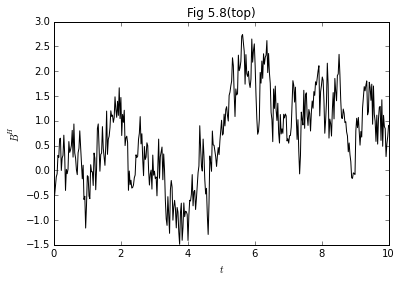

In [15]:
H=0.25; X=fbm(t,H)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'$B^H$')
s=plt.title(r'Fig 5.8(top)')

When $H>0.75$, samples paths of fractional Brownian motion are smoother.

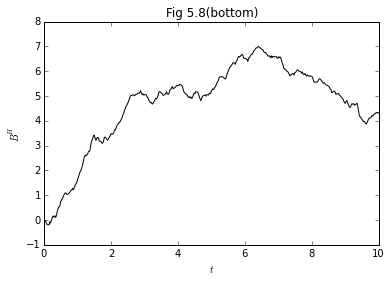

In [16]:
H=0.75; X=fbm(t,H)
plt.plot(t,X,'k-')
s=plt.xlabel(r'$t$')
s=plt.ylabel(r'$B^H$')
s=plt.title(r'Fig 5.8(bottom)')